Dataset cargado: 72 filas, 20 columnas

 COLUMNAS ENCONTRADAS:
    1. behavior_sexualRisk
    2. behavior_eating
    3. behavior_personalHygine
    4. intention_aggregation
    5. intention_commitment
    6. attitude_consistency
    7. attitude_spontaneity
    8. norm_significantPerson
    9. norm_fulfillment
   10. perception_vulnerability
   11. perception_severity
   12. motivation_strength
   13. motivation_willingness
   14. socialSupport_emotionality
   15. socialSupport_appreciation
   16. socialSupport_instrumental
   17. empowerment_knowledge
   18. empowerment_abilities
   19. empowerment_desires
   20. ca_cervix

VARIABLE OBJETIVO 'ca_cervix':
   • Valores únicos: [np.int64(0), np.int64(1)]
   • Distribución:
     - 0 (Sin cáncer): 51 (70.8%)
     - 1 (Con cáncer): 21 (29.2%)

MUESTRA DE DATOS REALES (5 filas):
   behavior_sexualRisk  behavior_eating  behavior_personalHygine  \
0                   10               13                       12   
1                   10        

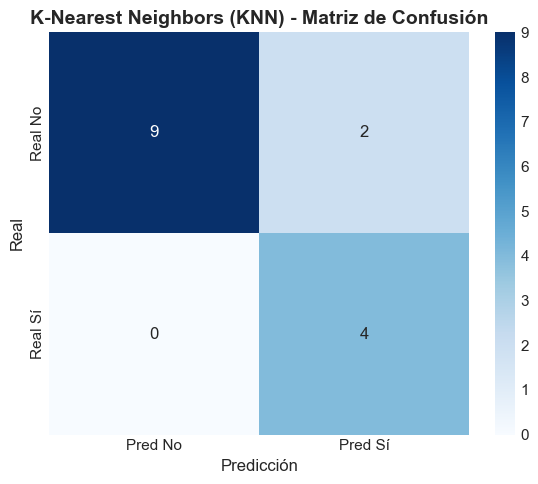

 Área bajo curva ROC (AUC): 1.0000

Árbol de Decisión
 Exactitud: 0.8000

Reporte de Clasificación:
              precision    recall  f1-score   support

  Sin Cáncer       0.90      0.82      0.86        11
  Con Cáncer       0.60      0.75      0.67         4

    accuracy                           0.80        15
   macro avg       0.75      0.78      0.76        15
weighted avg       0.82      0.80      0.81        15

Matriz de Confusión:
[[9 2]
 [1 3]]


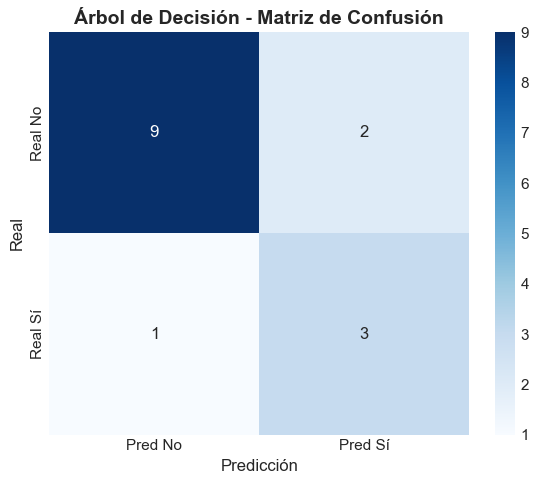

 Área bajo curva ROC (AUC): 0.7841

Support Vector Machine (SVM)
 Exactitud: 0.8667

Reporte de Clasificación:
              precision    recall  f1-score   support

  Sin Cáncer       1.00      0.82      0.90        11
  Con Cáncer       0.67      1.00      0.80         4

    accuracy                           0.87        15
   macro avg       0.83      0.91      0.85        15
weighted avg       0.91      0.87      0.87        15

Matriz de Confusión:
[[9 2]
 [0 4]]


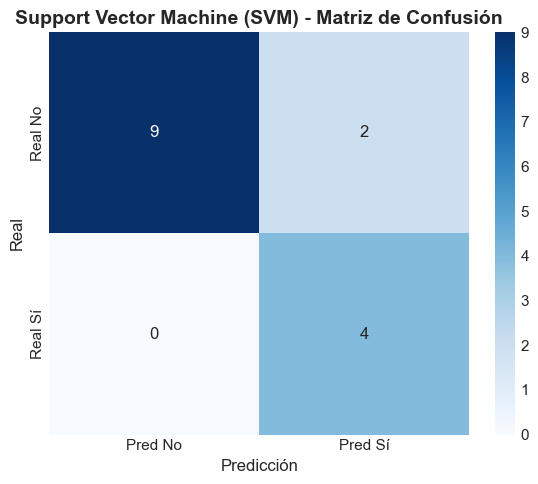

 Área bajo curva ROC (AUC): 0.9773

CURVAS ROC


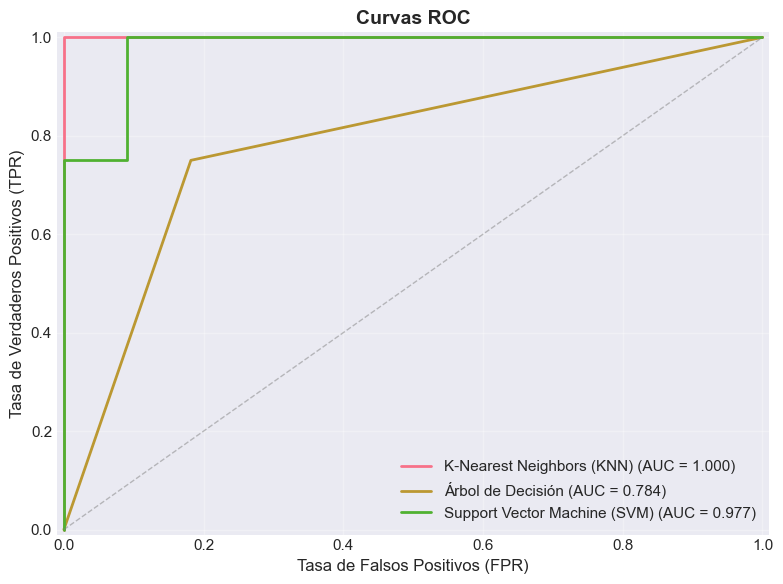


RESUMEN FINAL

MEJOR MODELO: K-Nearest Neighbors
   • Exactitud: 0.867

TODOS LOS MODELOS:
   • K-Nearest Neighbors      : 0.867
   • Árbol de Decisión        : 0.800
   • SVM                      : 0.867

ESTADÍSTICAS DEL DATASET:
   • Total muestras: 72
   • Con cáncer: 21 (29.2%)
   • Sin cáncer: 51 (70.8%)
   • Variables: 19


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)


# Ruta a tu archivo
file_path = 'C:/sobar-72.csv'
data = pd.read_csv(file_path)

print(f"Dataset cargado: {data.shape[0]} filas, {data.shape[1]} columnas")

# Verificar columnas
print(f"\n COLUMNAS ENCONTRADAS:")
for i, col in enumerate(data.columns, 1):
    print(f"   {i:2d}. {col}")

# Verificar la variable objetivo
print(f"\nVARIABLE OBJETIVO 'ca_cervix':")
if 'ca_cervix' in data.columns:
    unique_vals = data['ca_cervix'].unique()
    print(f"   • Valores únicos: {sorted(unique_vals)}")
    print(f"   • Distribución:")
    for val in sorted(unique_vals):
        count = (data['ca_cervix'] == val).sum()
        perc = count / len(data) * 100
        label = "Con cáncer" if val == 1 else "Sin cáncer"
        print(f"     - {val} ({label}): {count} ({perc:.1f}%)")
else:
    print(" ERROR: No se encuentra 'ca_cervix' en las columnas")
    print("   Columnas disponibles:", list(data.columns))

print(f"\nMUESTRA DE DATOS REALES (5 filas):")
print(data.head(5))


print(" PREPROCESANDO DATOS")


# Verificar que tenemos la columna objetivo
if 'ca_cervix' not in data.columns:
    raise ValueError("La columna 'ca_cervix' no existe. Verifica tu dataset.")

# Separar características y target
X = data.drop('ca_cervix', axis=1)
y = data['ca_cervix']

print(f"Separación completada:")
print(f"   • Características (X): {X.shape}")
print(f"   • Target (y): {y.shape}")

# Escalar (MinMaxScaler pondrá todo entre 0-1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nEscalado MinMax completado:")
print(f"   • Valores ahora entre {X_scaled.min():.2f} y {X_scaled.max():.2f}")

# Dividir datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDivisión 80/20:")
print(f"   • Entrenamiento: {X_train.shape[0]} muestras")
print(f"   • Prueba: {X_test.shape[0]} muestras")

print(f"\nDistribución en entrenamiento:")
train_0 = (y_train == 0).sum()
train_1 = (y_train == 1).sum()
print(f"   • Sin cáncer: {train_0} ({train_0/len(y_train)*100:.1f}%)")
print(f"   • Con cáncer: {train_1} ({train_1/len(y_train)*100:.1f}%)")

print(f"\nDistribución en prueba:")
test_0 = (y_test == 0).sum()
test_1 = (y_test == 1).sum()
print(f"   • Sin cáncer: {test_0} ({test_0/len(y_test)*100:.1f}%)")
print(f"   • Con cáncer: {test_1} ({test_1/len(y_test)*100:.1f}%)")


print(" ENTRENANDO MODELOS")


roc_data = {}

def evaluar_modelo(modelo, nombre, X_train, X_test, y_train, y_test, roc_data):
    """Entrena, evalúa y muestra resultados"""
    
    print(f"\n{nombre}")
    
    # Entrenar
    modelo.fit(X_train, y_train)
    
    # Predecir
    y_pred = modelo.predict(X_test)
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    print(f" Exactitud: {accuracy:.4f}")
    
    print(f"\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=['Sin Cáncer', 'Con Cáncer']))
    
    print(f"Matriz de Confusión:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    # Visualizar matriz
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred No', 'Pred Sí'],
                yticklabels=['Real No', 'Real Sí'])
    plt.title(f'{nombre} - Matriz de Confusión', fontsize=14, fontweight='bold')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()
    
    # Curva ROC
    if hasattr(modelo, "predict_proba"):
        y_prob = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        roc_data[nombre] = (fpr, tpr, roc_auc)
        print(f" Área bajo curva ROC (AUC): {roc_auc:.4f}")
    
    return accuracy

# 1. KNN
knn = KNeighborsClassifier(n_neighbors=5)
acc_knn = evaluar_modelo(knn, "K-Nearest Neighbors (KNN)", 
                        X_train, X_test, y_train, y_test, roc_data)

# 2. Árbol de Decisión
arbol = DecisionTreeClassifier(random_state=42, max_depth=4)
acc_arbol = evaluar_modelo(arbol, "Árbol de Decisión", 
                          X_train, X_test, y_train, y_test, roc_data)

# 3. SVM
svm = SVC(probability=True, random_state=42, kernel='rbf')
acc_svm = evaluar_modelo(svm, "Support Vector Machine (SVM)", 
                        X_train, X_test, y_train, y_test, roc_data)


print("\nCURVAS ROC")

if roc_data:
    plt.figure(figsize=(8, 6))
    
    for nombre, (fpr, tpr, auc_score) in roc_data.items():
        plt.plot(fpr, tpr, lw=2, label=f'{nombre} (AUC = {auc_score:.3f})')
    
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', alpha=0.5)
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curvas ROC', fontsize=14, fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(" No se pudieron generar curvas ROC")


print("\nRESUMEN FINAL")


# Crear comparación para el resumen final
comparacion = pd.DataFrame({
    'Modelo': ['K-Nearest Neighbors', 'Árbol de Decisión', 'SVM'],
    'Exactitud': [acc_knn, acc_arbol, acc_svm]
})

mejor_idx = comparacion['Exactitud'].idxmax()
mejor_modelo = comparacion.loc[mejor_idx, 'Modelo']
mejor_exactitud = comparacion.loc[mejor_idx, 'Exactitud']

print(f"\nMEJOR MODELO: {mejor_modelo}")
print(f"   • Exactitud: {mejor_exactitud:.3f}")

print(f"\nTODOS LOS MODELOS:")
for _, row in comparacion.iterrows():
    print(f"   • {row['Modelo']:25s}: {row['Exactitud']:.3f}")

print(f"\nESTADÍSTICAS DEL DATASET:")
print(f"   • Total muestras: {len(data)}")
print(f"   • Con cáncer: {sum(data['ca_cervix'] == 1)} ({sum(data['ca_cervix'] == 1)/len(data)*100:.1f}%)")
print(f"   • Sin cáncer: {sum(data['ca_cervix'] == 0)} ({sum(data['ca_cervix'] == 0)/len(data)*100:.1f}%)")
print(f"   • Variables: {len(X.columns)}")